# Classification: Techniques to handle multi-class classification

problems

Rafiq Islam  
2024-10-17

## Introduction

In machine learning, classification is one of the most common tasks,
where the goal is to assign a label to an input from a set of possible
categories. While binary classification, where there are only two labels
(e.g., spam vs. not spam), is well understood, real-world problems often
involve more than two classes—this is where **multi-class
classification** comes into play. In this post, we’ll explore various
techniques and algorithms used to solve multi-class classification
problems effectively.

## What is Multi-class Classification?

Multi-class classification involves assigning an input to one of several
distinct classes. For instance, given an image of an animal, the task
may be to classify it as either a dog, cat, horse, or bird. The key
challenge here is to handle more than two classes, which introduces
additional complexity compared to binary classification.

## Key Approaches to Multi-class Classification

There are two main ways of handling multi-class classification:

1.  **Native Multi-class Algorithms:** Some algorithms are inherently
    designed to work with multiple classes without any modifications.
2.  **Binary to Multi-class Strategies:** These approaches decompose the
    multi-class problem into multiple binary classification problems.

Let’s consider the classic Iris dataset that contains three classes of
iris species: *setosa, versicolor, virginica*. We will use this dataset
to demonstrate different multi-class classification techniques in
python.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

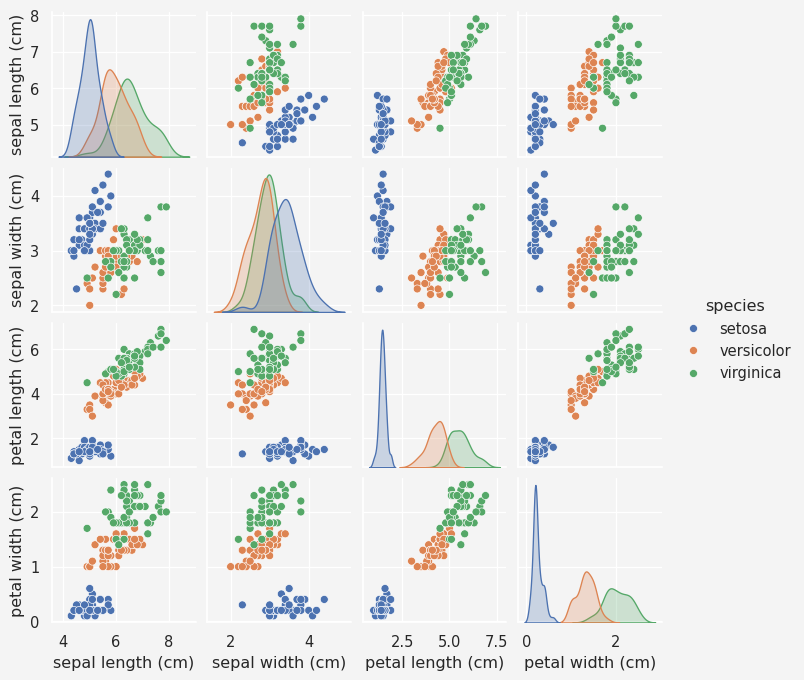

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns 
import matplotlib.pyplot as plt 

# set the background color
sns.set(rc={'axes.facecolor': '#f4f4f4', 'figure.facecolor':'#f4f4f4'})
  

iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())
sns.pairplot(df, hue='species', height=1.8, aspect=0.99)
plt.show()

### Native Multi-class Algorithms

These are algorithms that can directly handle multiple classes in their
formulation:

**a. <a href="../../dsandml/decisiontree/index.qmd"
style="text-decoration:none" target="_blank">Decision Trees</a>** (See
more here)

Decision Trees can naturally handle multi-class classification tasks. At
each split, the tree decides on a rule that best separates the data into
groups. The terminal nodes (leaves) represent the class predictions.

-   **Advantages**: Easy to interpret, no need for extensive
    pre-processing, and handles both categorical and numerical features.
-   **Disadvantages**: Prone to overfitting and can produce unstable
    models if not carefully tuned.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.3,
    random_state=123
    )
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45


**b. <a href="../../dsandml/randomforest/index.qmd"
style="text-decoration:none" target="_blank">Random Forests</a>** (See
more here)

Random Forests are ensembles of decision trees and can also naturally
handle multi-class classification. They aggregate the predictions from
multiple trees to make a final classification decision.

-   **Advantages**: Higher accuracy and reduced overfitting compared to
    single decision trees.
-   **Disadvantages**: Less interpretable than individual trees, and
    training can be computationally intensive.

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45


**c. <a href="../../dsandml/naivebayes/index.qmd"
style="text-decoration:none" target="_blank">Naive Bayes</a>** (See more
here)

Naive Bayes is a probabilistic classifier based on Bayes’ theorem,
assuming that the features are independent. The algorithm calculates the
probability of each class and predicts the one with the highest
probability.

-   **Advantages**: Fast, simple, and works well for text
    classification.
-   **Disadvantages**: Assumes feature independence, which might not
    hold in many real-world datasets.

In [4]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.37      1.00      0.54        10
   virginica       0.00      0.00      0.00        17

    accuracy                           0.62        45
   macro avg       0.46      0.67      0.51        45
weighted avg       0.48      0.62      0.52        45


/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/hostedtoolcache/Python/3.10.15/x64/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


**d. <a href="../../dsandml/knn/index.qmd" style="text-decoration:none"
target="_blank">K-Nearest Neighbors (KNN)</a>** (See more here)

KNN is a non-parametric algorithm that classifies a data point based on
the majority class of its k-nearest neighbors. It can handle multi-class
problems by considering the most frequent class among the neighbors.

-   **Advantages**: Simple to implement, no training phase.
-   **Disadvantages**: Slow at prediction time, sensitive to the choice
    of k and the distance metric.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.90      0.95        10
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


### Binary to Multi-class Strategies

Some algorithms are inherently binary, but they can be adapted to handle
multiple classes using strategies like:

**a. One-vs-Rest (OvR)**

This technique involves training one classifier per class. Each
classifier is trained to distinguish one class from the rest (i.e.,
treat it as a binary classification problem). During prediction, the
classifier that outputs the highest confidence score assigns the label.

-   **Advantages**: Simple and works well with many binary classifiers
    like logistic regression and support vector machines.
-   **Disadvantages**: Can become inefficient when there are many
    classes, since it requires training one model per class.

Example with
<a href="../../dsandml/logreg/index.qmd" style="text-decoration:none"
target="_blank">Logistic Regression</a>

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45


**b. One-vs-One (OvO)**

This strategy involves training a binary classifier for every possible
pair of classes. For a dataset with $n$ classes, $\frac{n(n-1)}{2}$
classifiers are trained. The class with the most “votes” from the
classifiers is the predicted label.

-   **Advantages**: Works well when there are fewer classes.
-   **Disadvantages**: Computationally expensive for large class numbers
    due to the many classifiers needed.

Example with support vector classifier

In [7]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

clf = OneVsOneClassifier(SVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.71      1.00      0.83        10
   virginica       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.90        45
weighted avg       0.94      0.91      0.91        45


#### 3. Neural Networks for Multi-class Classification

**a. Softmax Regression**

In neural networks, multi-class classification is typically handled
using the **softmax** function in the output layer. Softmax converts raw
output scores (logits) into probabilities for each class, ensuring they
sum to 1. The class with the highest probability is chosen as the
predicted class.

-   **Advantages**: Can model complex non-linear relationships and works
    well with large datasets.
-   **Disadvantages**: Requires more data and computational resources
    compared to simpler models.

In [8]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

input_layer = Input(shape = (X_train.shape[1],))

model = Sequential([
    input_layer,
    Dense(64, activation = 'relu'),
    
    Dense(64, activation = 'relu'),
    
    Dense(3, activation = 'softmax')
])

optimizer = SGD(learning_rate=0.001)
model.compile(
    optimizer = optimizer, 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )
model.fit(X_train, y_train, epochs = 50, batch_size = 10, verbose = 0)
test_loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')  

2024-12-13 02:08:28.440349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734055708.454812   19329 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734055708.459169   19329 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-13 02:08:28.475317: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-13 02:08:30.062360: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9375 - loss: 0.62342/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9495 - loss: 0.6206
Test Accuracy: 0.9555555582046509

Training and Validation loss

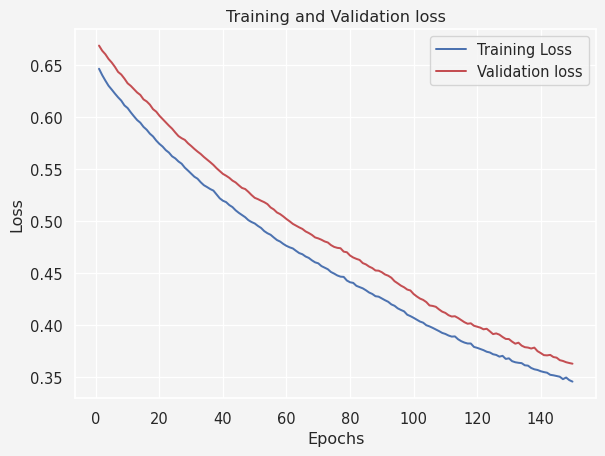

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.10, random_state=123,
    stratify=y_train
)

history = model.fit(
    X_train, y_train, epochs = 150, 
    batch_size = 10, verbose = 0,
    validation_data = (X_val, y_val)
    )

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, 'b-', label = "Training Loss")
plt.plot(epochs, val_loss, 'r-', label = "Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**b. Convolutional Neural Networks (CNNs)**

For image classification tasks, **CNNs** are widely used. CNNs
automatically learn spatial hierarchies of features, making them highly
effective for tasks like object recognition in images.

-   **Advantages**: Superior performance on image data, able to capture
    spatial dependencies.
-   **Disadvantages**: Require large amounts of labeled data and
    significant computational power for training.

## Performance Evaluation in Multi-class Classification

Evaluating multi-class classification models requires more nuanced
metrics than binary classification. Some common evaluation metrics
include:

-   **Accuracy**: The percentage of correctly classified instances.
-   **Confusion Matrix**: A table showing the actual versus predicted
    classes for each class.
-   **Precision, Recall, and F1-score**: These can be extended to
    multiple classes by calculating them per class (micro, macro, or
    weighted averages).
-   **Receiver Operating Characteristic (ROC) and Area Under the Curve
    (AUC)**: These are less commonly used for multi-class problems, but
    can still be adapted using OvR schemes.

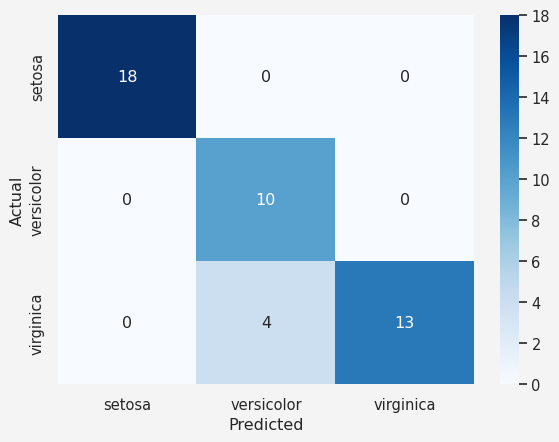

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

Multi-class classification is a critical aspect of many real-world
applications, from medical diagnosis to image recognition and beyond. By
understanding the strengths and limitations of different algorithms and
strategies, we can choose the best approach for the task at hand.
Whether using native multi-class models like decision trees or adapting
binary models with OvR or OvO strategies, it’s essential to carefully
consider the nature of the data, the number of classes, and
computational constraints when building the models.

## References

1.  **Scikit-learn Documentation**:  
    The Python code snippets for decision trees, random forests, KNN,
    logistic regression, and support vector machines (SVM) are based on
    the Scikit-learn library.
    -   Scikit-learn:
        <a href="https://scikit-learn.org/stable/supervised_learning.html"
        style="text-decoration:none"
        target="_blank">https://scikit-learn.org/stable/supervised_learning.html</a>
2.  **Iris Dataset**:  
    The Iris dataset is a well-known dataset for classification tasks
    and is included in the UCI Machine Learning Repository:
    -   UCI Machine Learning Repository:
        <a href="https://archive.ics.uci.edu/ml/datasets/iris"
        style="text-decoration:none"
        target="_blank">https://archive.ics.uci.edu/ml/datasets/iris</a>
3.  **Confusion Matrix & Evaluation Metrics**:  
    For metrics such as accuracy, precision, recall, F1-score, and
    confusion matrices, the Scikit-learn library offers comprehensive
    functions to evaluate multi-class classification models:
    -   Scikit-learn metrics documentation:
        <a href="https://scikit-learn.org/stable/modules/model_evaluation.html"
        style="text-decoration:none"
        target="_blank">https://scikit-learn.org/stable/modules/model_evaluation.html</a>
4.  **Softmax and Neural Networks**:  
    The Python code for neural networks using TensorFlow/Keras employs
    the `softmax` function for multi-class classification.
    -   TensorFlow/Keras:
        <a href="https://www.tensorflow.org/" style="text-decoration:none"
        target="_blank">https://www.tensorflow.org/</a>
5.  **Introduction to Multi-class Classification**:  
    General information about multi-class classification can be found in
    machine learning books and resources, such as “Hands-On Machine
    Learning with Scikit-Learn, Keras, and TensorFlow” by Aurélien
    Géron:
    -   <a
        href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/"
        style="text-decoration:none" target="_blank">Hands-On Machine Learning
        with Scikit-Learn, Keras, and TensorFlow on O’Reilly</a>

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/multiclass/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/multiclass/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/multiclass/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**